# Comparing pass managers
This notebook display graphs comparing
- Depth
- Depth ratio
- Time
- Cx gate count
- Total gate count
of all of the pass managers. 

It will also display a table summarizing the results and shows the percent different compared to sabre_v020 routing pass.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

In [2]:
# Variables to change

qc_names = ["ghz_2-127", "ghz_100", 
            "size5_depth_1-10", "size5_depth_10-500"
            "size25_depth_10"]
qc_name = qc_names[2]

print(f"Running experiment for the circuits: {qc_name}")
excluded_datasets = []

directory_path = f'data/{qc_name}'
files = [f for f in os.listdir(directory_path) if f.endswith('.csv') and f.replace('.csv', '') not in excluded_datasets]

datasets = {}
for file in files:
    dataset_path = os.path.join(directory_path, file)
    dataset_name = file.replace('.csv', '')
    datasets[dataset_name] = pd.read_csv(dataset_path)

Running experiment for the circuits: size5_depth_1-10


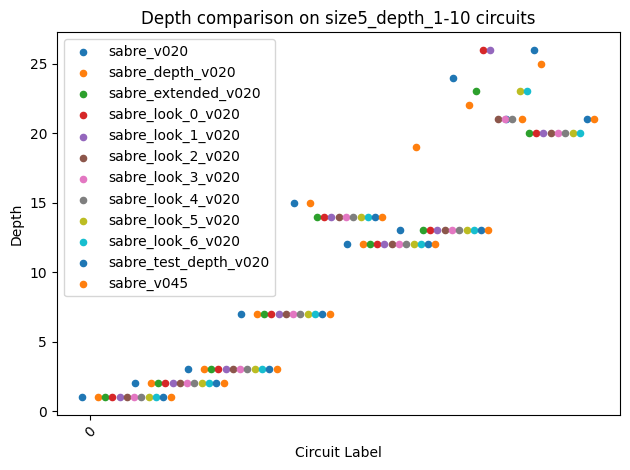

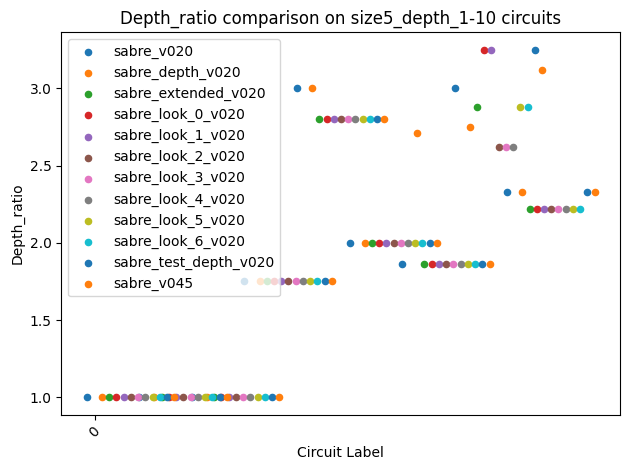

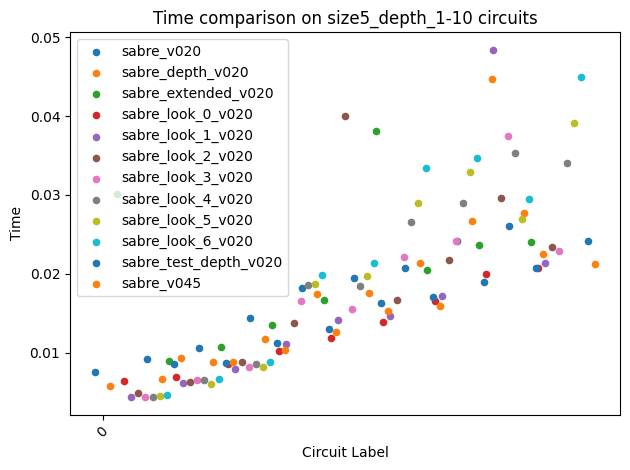

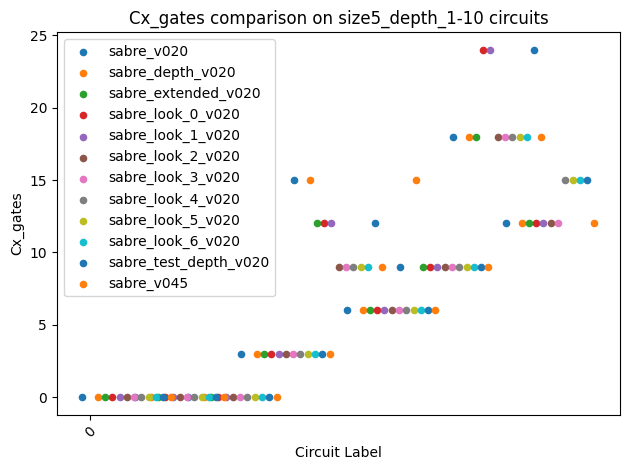

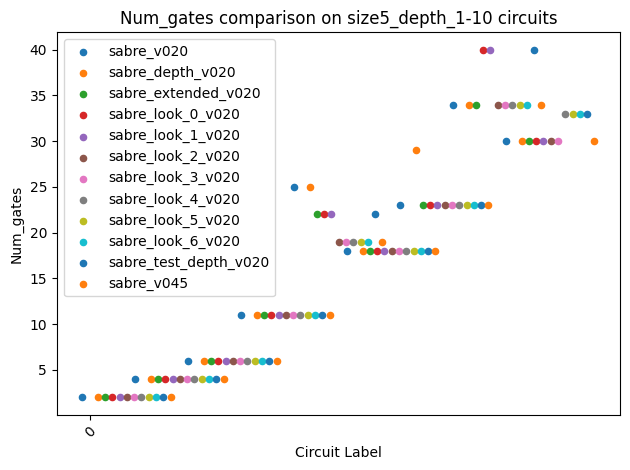

In [3]:
# Sorting dataset names (excluding the reference dataset)
ref_dataset_name = 'sabre_v020'  # Change as needed
sorted_dataset_names = sorted([name for name in datasets.keys() if name != ref_dataset_name])


labels = list(set(sum([df['circuit label'].tolist() for df in datasets.values()], [])))
labels.sort()

x = np.arange(len(labels))
num_datasets = len(datasets) - 1  # excluding the reference dataset
shift = 0.15
shift_increment = (num_datasets * shift) / (num_datasets + 1)

# Plotting each attribute
attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
for attribute in attributes:
    fig, ax = plt.subplots()

    # Plotting reference dataset separately
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_vals = [ref_values[datasets[ref_dataset_name]['circuit label'].tolist().index(label)] if label in datasets[ref_dataset_name]['circuit label'].tolist() else 0 for label in labels]
    ax.scatter(x - shift, ref_vals, label=ref_dataset_name, s=20)

    # Plotting other datasets
    for i, dataset_name in enumerate(sorted_dataset_names):
        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        vals = [values[df['circuit label'].tolist().index(label)] if label in df['circuit label'].tolist() else 0 for label in labels]
        
        ax.scatter(x + (i + 1) * shift_increment, vals, label=dataset_name, s=20)

    # Setting labels and title
    ax.set_xlabel('Circuit Label')
    ax.set_ylabel(attribute.capitalize())
    ax.set_title(f'{attribute.capitalize()} comparison on {qc_name} circuits')

    # Setting ticks
    n = 10
    ax.set_xticks(x[::n])
    ax.set_xticklabels(labels[::n], rotation=45)

    ax.legend()
    fig.tight_layout()
    plt.show()



In [4]:
if ref_dataset_name not in datasets:
    raise ValueError(f"Reference dataset '{ref_dataset_name}' not found in the provided directory.")

#attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
attributes = ['depth', 'time']
avg_results = {attribute: [] for attribute in attributes}
sorted_dataset_names = sorted(datasets.keys())


for attribute in attributes:
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_avg = np.mean(ref_values)
    
    for dataset_name in sorted_dataset_names:
        if dataset_name == ref_dataset_name:
            continue

        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        avg = np.mean(values)
        percent_diff = ((avg - ref_avg) / ref_avg) * 100

        avg_results[attribute].append([dataset_name, avg, percent_diff])


for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

--- Depth Comparison ---
                  Dataset  Average Depth  Percentage Difference (%)
0        sabre_depth_v020      11.333333                   4.081633
1     sabre_extended_v020      10.555556                  -3.061224
2       sabre_look_0_v020      10.888889                   0.000000
3       sabre_look_1_v020      10.888889                   0.000000
4       sabre_look_2_v020      10.333333                  -5.102041
5       sabre_look_3_v020      10.333333                  -5.102041
6       sabre_look_4_v020      10.333333                  -5.102041
7       sabre_look_5_v020      10.555556                  -3.061224
8       sabre_look_6_v020      10.555556                  -3.061224
9   sabre_test_depth_v020      11.000000                   1.020408
10             sabre_v045      10.888889                   0.000000


--- Time Comparison ---
                  Dataset  Average Time  Percentage Difference (%)
0        sabre_depth_v020      0.015978                  -4.133276

In [5]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


--- Depth Comparison ---
                  Dataset  Average Depth  Percentage Difference (%)
0        sabre_depth_v020      11.333333                   4.081633
1     sabre_extended_v020      10.555556                  -3.061224
2       sabre_look_0_v020      10.888889                   0.000000
3       sabre_look_1_v020      10.888889                   0.000000
4       sabre_look_2_v020      10.333333                  -5.102041
5       sabre_look_3_v020      10.333333                  -5.102041
6       sabre_look_4_v020      10.333333                  -5.102041
7       sabre_look_5_v020      10.555556                  -3.061224
8       sabre_look_6_v020      10.555556                  -3.061224
9   sabre_test_depth_v020      11.000000                   1.020408
10             sabre_v045      10.888889                   0.000000




/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_76585/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


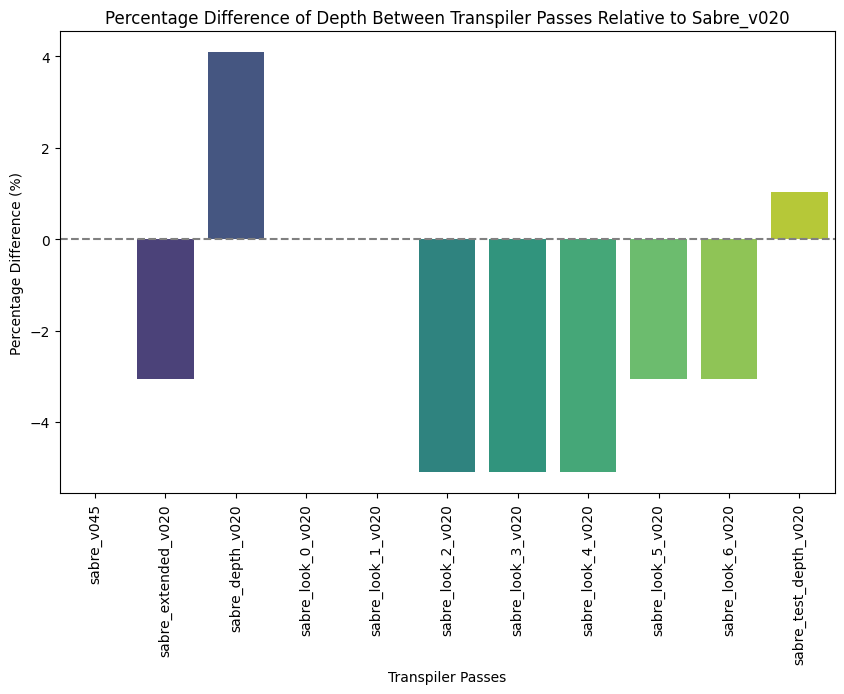

--- Time Comparison ---
                  Dataset  Average Time  Percentage Difference (%)
0        sabre_depth_v020      0.015978                  -4.133276
1     sabre_extended_v020      0.020690                  24.134325
2       sabre_look_0_v020      0.012788                 -23.271908
3       sabre_look_1_v020      0.016130                  -3.224925
4       sabre_look_2_v020      0.018343                  10.055916
5       sabre_look_3_v020      0.017546                   5.274158
6       sabre_look_4_v020      0.020158                  20.947069
7       sabre_look_5_v020      0.020569                  23.408756
8       sabre_look_6_v020      0.022668                  36.004717
9   sabre_test_depth_v020      0.015384                  -7.696428
10             sabre_v045      0.017855                   7.125510




/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_76585/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


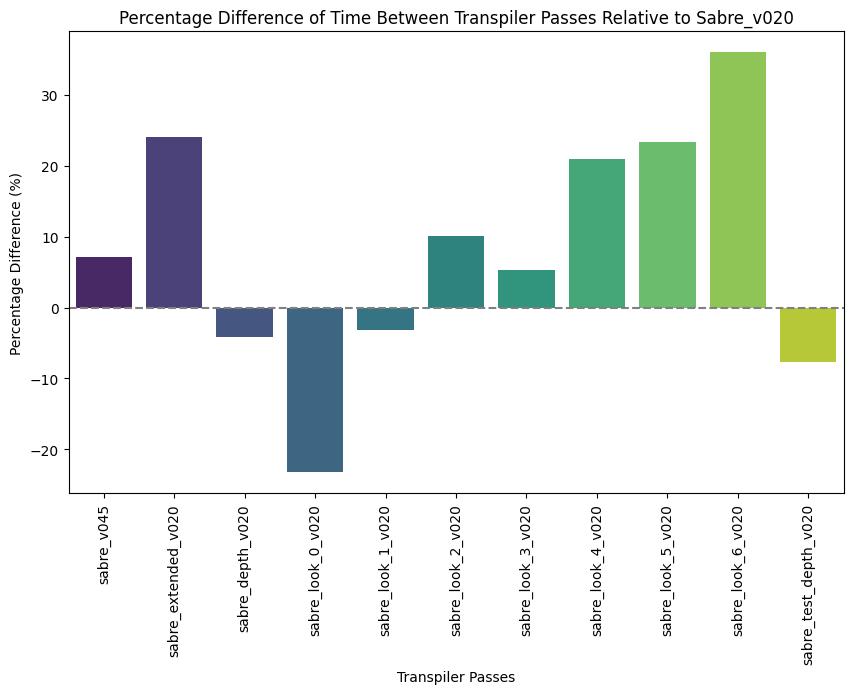

In [6]:
# Swapping the placement of the second and third bar in the adjusted bar graphs

for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

    # Reordering the dataset so that the last one is now first and then swapping the second and third bars
    reordered_comparison = avg_comparison.sort_values('Dataset')
    reordered_comparison = pd.concat([reordered_comparison.iloc[-1:], reordered_comparison.iloc[:-1]])
    reordered_comparison.iloc[[1, 2]] = reordered_comparison.iloc[[2, 1]].values

    # Plotting with the newly adjusted order
    plt.figure(figsize=(10, 6))
    sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')
    plt.title(f'Percentage Difference of {attribute.capitalize()} Between Transpiler Passes Relative to Sabre_v020')
    plt.xlabel('Transpiler Passes')
    plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
    plt.ylabel('Percentage Difference (%)')
    plt.axhline(0, color='gray', linestyle='--')  # Horizontal line at x = 0
    plt.show()
